<a href="https://colab.research.google.com/github/aruntahilramani/134_ArunTahilramani/blob/master/Lab8/134_KMeans_Clustering_BreastCancerData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Write a python program to perform K-Means clustering on Breast Cancer Data

## For Labelled Data

In [1]:
# Using scikit-learn to perform K-Means clustering
from sklearn.cluster import KMeans
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
dataset.data.shape

(569, 30)

In [2]:
dataset

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

In [3]:
kmeans = KMeans(n_clusters=2, random_state=134)
prediction = kmeans.fit_predict(dataset.data)
prediction

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [4]:
kmeans.cluster_centers_.shape

(2, 30)

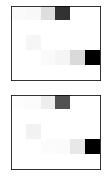

In [5]:
# Scatter plot of the data points
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(2, 5, 6)
for axi, center in zip(ax.flat, centers):
  axi.set(xticks=[], yticks=[])
  axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [6]:
import numpy as np
from scipy.stats import mode

labels = np.zeros_like(prediction)
for i in range(2):
  mask = (prediction == i)
  labels[mask] = mode(dataset.target[mask])[0]

In [7]:
from sklearn.metrics import accuracy_score
accuracy_score(dataset.target, labels)

0.8541300527240774

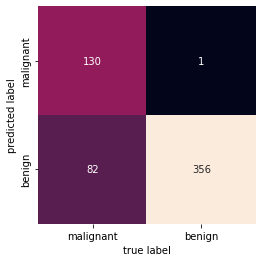

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(dataset.target, labels)
ax = sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
                  xticklabels=dataset.target_names,
                  yticklabels=dataset.target_names)
ax.set_ylim(2.0,0)
plt.xlabel('true label')
plt.ylabel('predicted label');

##For Unlabeled Data

In [9]:
X = dataset.data
Y = dataset.target

In [10]:
# Using scikit-learn to perform K-Means clustering
from sklearn.cluster import KMeans
# Specify the number of clusters and fit the data X
kmeans = KMeans(n_clusters=2, random_state=134).fit(X)

In [11]:
# Get the cluster centroids
kmeans.cluster_centers_

array([[1.25562991e+01, 1.85703653e+01, 8.11234703e+01, 4.96061872e+02,
        9.48844977e-02, 9.10998174e-02, 6.24377642e-02, 3.34325434e-02,
        1.78057991e-01, 6.34540183e-02, 3.04190868e-01, 1.21515320e+00,
        2.15288059e+00, 2.37852922e+01, 7.17326256e-03, 2.34746895e-02,
        2.87455128e-02, 1.06363242e-02, 2.06135799e-02, 3.74750297e-03,
        1.40439018e+01, 2.47095434e+01, 9.19375114e+01, 6.19647945e+02,
        1.29959110e-01, 2.23311758e-01, 2.19214947e-01, 9.13298425e-02,
        2.83553653e-01, 8.32819406e-02],
       [1.93799237e+01, 2.16945802e+01, 1.28231298e+02, 1.18592977e+03,
        1.01294580e-01, 1.48612977e-01, 1.76939466e-01, 1.00698779e-01,
        1.91539695e-01, 6.06029008e-02, 7.42803817e-01, 1.22253817e+00,
        5.25058015e+00, 9.56781679e+01, 6.59868702e-03, 3.21766947e-02,
        4.24197710e-02, 1.56739847e-02, 2.03039695e-02, 3.95338931e-03,
        2.37094656e+01, 2.89126718e+01, 1.58496183e+02, 1.75302290e+03,
        1.40424733e-01,

In [12]:
# Get the cluster labels
kmeans.labels_

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [13]:
# Calculate silhouette_score
from sklearn.metrics import silhouette_score
print(silhouette_score(X, kmeans.labels_))

0.6972646156059464


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


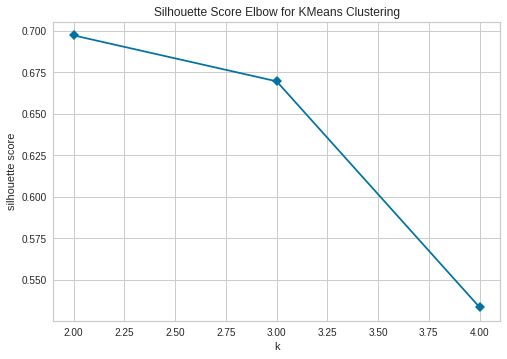

In [14]:
# Import the KElbowVisualizer method
from yellowbrick.cluster import KElbowVisualizer
# Instantiate a scikit-learn K-Means model
model = KMeans(random_state=134)
# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model, k=(2,5), metric='silhouette',timings=False)
# Fit the data and visualize
visualizer.fit(X)
visualizer.poof()